In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import pandas as pd
from scipy.stats import mannwhitneyu

In [2]:
Coverage =  pd.read_csv('/Volumes/TwoTeras/Graph_Stuff/CSVs/Unique_NodeVisit_Ratios.csv')

In [3]:
exp1_data = Coverage[Coverage['Experiment'] == 'Exp1']
exp2_data = Coverage[Coverage['Experiment'] == 'Exp2']

In [4]:
node_visits_test = mannwhitneyu(exp1_data['IndividualNodeCount'], exp2_data['IndividualNodeCount'])
print('Node Visits Test:', node_visits_test)


Node Visits Test: MannwhitneyuResult(statistic=5241.0, pvalue=0.0912880746832353)


In [5]:
# Number of Node Visits
node_visits_test = mannwhitneyu(exp1_data['IndividualNodeCount'], exp2_data['IndividualNodeCount'])
U = node_visits_test.statistic
p = node_visits_test.pvalue
N1 = len(exp1_data['IndividualNodeCount'])
N2 = len(exp2_data['IndividualNodeCount'])

# Calculate mean and standard deviation of U
mean_U = N1 * N2 / 2
std_U = np.sqrt(N1 * N2 * (N1 + N2 + 1) / 12)

# Calculate Z value
Z = (U - mean_U) / std_U

# Calculate effect size
r = Z / np.sqrt(N1 + N2)

print(f"U = {U}, p = {p}, Z = {Z}, r = {r}")

# Repeat similar steps for Increase in Node Visits and Coverage Ratio

# Calculate the increase in node visits through sessions for both groups
exp1_data_sorted = exp1_data.sort_values(by=['ParticipantID', 'SessionNr'])
exp2_data_sorted = exp2_data.sort_values(by=['ParticipantID', 'SessionNr'])

exp1_data_sorted['NodeVisitIncrease'] = exp1_data_sorted.groupby('ParticipantID')['IndividualNodeCount'].diff()
exp2_data_sorted['NodeVisitIncrease'] = exp2_data_sorted.groupby('ParticipantID')['IndividualNodeCount'].diff()

# Drop NaN values that result from diff calculation
exp1_increase = exp1_data_sorted['NodeVisitIncrease'].dropna()
exp2_increase = exp2_data_sorted['NodeVisitIncrease'].dropna()

# Mann-Whitney U Test for the increase in node visits
node_visit_increase_test = mannwhitneyu(exp1_increase, exp2_increase)
U_increase = node_visit_increase_test.statistic
p_increase = node_visit_increase_test.pvalue
N1_increase = len(exp1_increase)
N2_increase = len(exp2_increase)

# Calculate mean and standard deviation of U for increase in node visits
mean_U_increase = N1_increase * N2_increase / 2
std_U_increase = np.sqrt(N1_increase * N2_increase * (N1_increase + N2_increase + 1) / 12)

# Calculate Z value for increase in node visits
Z_increase = (U_increase - mean_U_increase) / std_U_increase

# Calculate effect size for increase in node visits
r_increase = Z_increase / np.sqrt(N1_increase + N2_increase)

print(f"U = {U_increase}, p = {p_increase}, Z = {Z_increase}, r = {r_increase}")

# Mann-Whitney U Test for the coverage ratio
coverage_ratio_test = mannwhitneyu(exp1_data['CummulativeRatio'], exp2_data['CummulativeRatio'])
U_coverage = coverage_ratio_test.statistic
p_coverage = coverage_ratio_test.pvalue
N1_coverage = len(exp1_data['CummulativeRatio'])
N2_coverage = len(exp2_data['CummulativeRatio'])

# Calculate mean and standard deviation of U for coverage ratio
mean_U_coverage = N1_coverage * N2_coverage / 2
std_U_coverage = np.sqrt(N1_coverage * N2_coverage * (N1_coverage + N2_coverage + 1) / 12)

# Calculate Z value for coverage ratio
Z_coverage = (U_coverage - mean_U_coverage) / std_U_coverage

# Calculate effect size for coverage ratio
r_coverage = Z_coverage / np.sqrt(N1_coverage + N2_coverage)

# Calculate the medians for the required statistics
exp1_median_node_visits = exp1_data['IndividualNodeCount'].mean()
exp2_median_node_visits = exp2_data['IndividualNodeCount'].mean()

exp1_median_increase = exp1_increase.mean()
exp2_median_increase = exp2_increase.median()

exp1_median_coverage = exp1_data['CummulativeRatio'].mean()
exp2_median_coverage = exp2_data['CummulativeRatio'].mean()

print(f" U = {U_coverage}, p = {p_coverage}, Z = {Z_coverage}, r = {r_coverage}")


U = 5241.0, p = 0.0912880746832353, Z = -1.689027406610565, r = -0.11387420452334894
U = 3732.5, p = 0.6978685337308748, Z = -0.3894898871338352, r = -0.029358904892291014
 U = 5234.0, p = 0.0885146071781497, Z = -1.703871338620953, r = -0.11487498221533067


In [6]:
# Print the medians
exp1_median_node_visits, exp2_median_node_visits, exp1_median_increase, exp2_median_increase, exp1_median_coverage, exp2_median_coverage

(83.29565217391304,
 87.19047619047619,
 4.130434782608695,
 4.0,
 0.7026967528893782,
 0.7271850512356842)

In [7]:
coverage_ratio_test = mannwhitneyu(exp1_data['CummulativeRatio'], exp2_data['CummulativeRatio'])
print('Coverage Ratio Test:', coverage_ratio_test)

Coverage Ratio Test: MannwhitneyuResult(statistic=5234.0, pvalue=0.0885146071781497)


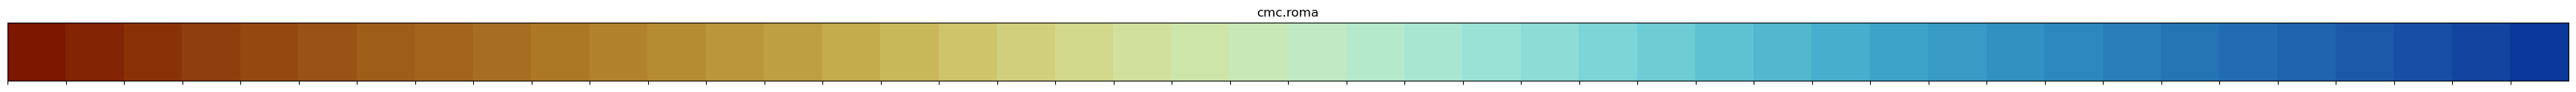

In [8]:
def create_palette(colormap_name, indices):
    try:
        colormap = plt.get_cmap(colormap_name)
        palette = colormap(indices)
        return palette
    except ValueError:
        print(f"Colormap '{colormap_name}' is not found.")
        return None

def display_palette(palette, title):
    if palette is not None:
        sns.palplot(palette)
        plt.title(title)
    else:
        print(f"Palette for '{title}' could not be displayed.")

num_colors = 220
color_indices = np.linspace(0, 1, num_colors)
selected_indices = list(range(0, 220, 5))

# Dictionary to store palettes
palettes = {}

# Create palettes for each colormap
for colormap_name in ['cmc.roma']:
    palettes[colormap_name] = create_palette(colormap_name, color_indices[selected_indices])

# Optional: Display the palettes
for name, palette in palettes.items():
    display_palette(palette, name)

plt.show()

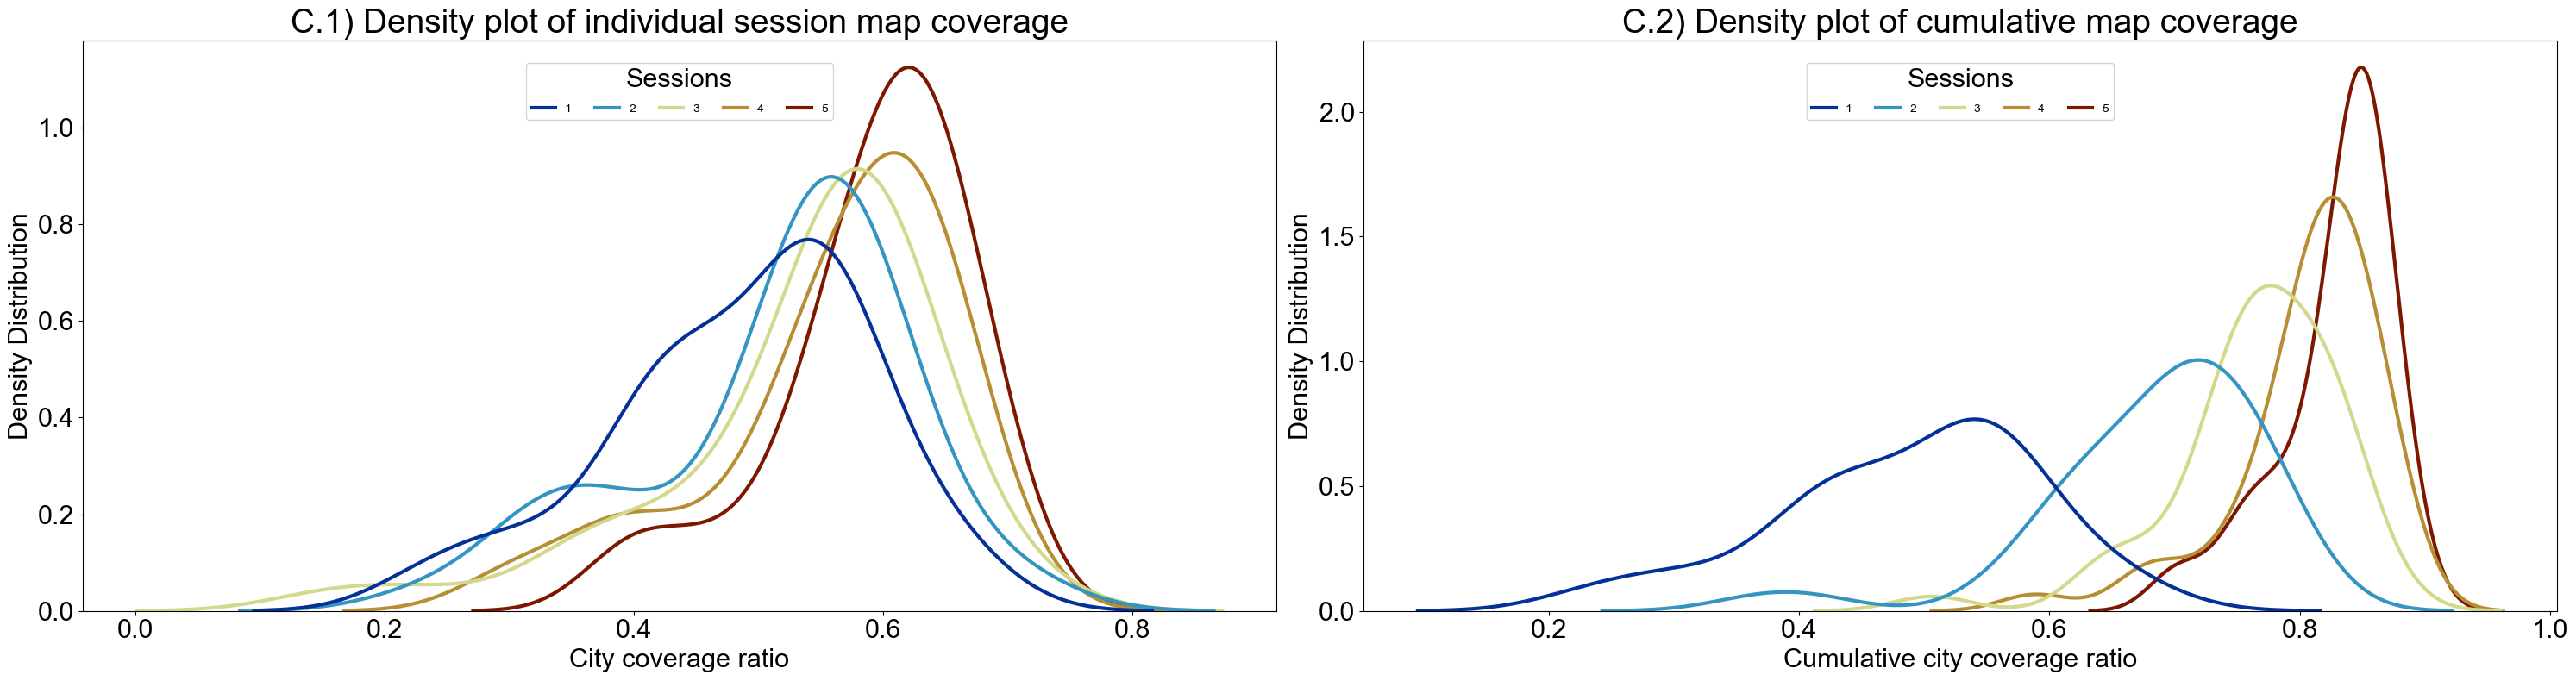

In [9]:

custom_palette = ["#033198", "#3495c3", "#d2d98d", "#b78e33", "#7e1700"]
# Filter out the control group for plotting
filtered_df = Coverage[Coverage['Experiment'] != 'Control'].copy()
plt.rcParams['font.family'] = 'Arial'

# Set up the matplotlib figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(30,8))  # Adjusted figure size for better layout

# KDE plot for IndividualRatio with increased line width
g = sns.kdeplot(data=filtered_df, x='IndividualRatio', hue='SessionNr', palette=custom_palette, ax=axes[0], linewidth=3)  # Increased linewidth
axes[0].set_xlabel('City coverage ratio', fontsize=22)
axes[0].set_ylabel('Density Distribution', fontsize=22)
axes[0].set_title('C.1) Density plot of individual session map coverage', fontsize=28)
axes[0].tick_params(labelsize=22) 
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, .85), ncol=5, title='Sessions')
leg = g.get_legend()
leg._legend_box.align = "center"
leg.set_title('Sessions', prop={'size': 22})

# Expand the size of the legend box
leg._legend_box.sep = 10

# KDE plot for CummulativeRatio with increased line width
g2 = sns.kdeplot(data=filtered_df, x='CummulativeRatio', hue='SessionNr', palette=custom_palette, ax=axes[1], linewidth=3)  # Increased linewidth
sns.move_legend(g2, "lower center", bbox_to_anchor=(.5, .85), ncol=5, title='Sessions')
leg = g2.get_legend()
leg._legend_box.align = "center"
leg.set_title('Sessions', prop={'size': 22})

axes[1].set_xlabel('Cumulative city coverage ratio', fontsize=22)
axes[1].set_ylabel('Density Distribution', fontsize=22)
axes[1].set_title('C.2) Density plot of cumulative map coverage', fontsize=28)
axes[1].tick_params(labelsize=22)  

# Expand the size of the legend box
leg._legend_box.sep = 10

# Improve the layout
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Coverage_Ratios.png", bbox_inches="tight", pad_inches=0.3)
plt.show()


In [10]:
Coverage.head()

,ParticipantID,SessionNr,IndividualNodeCount,Experiment,CummulativeNodeCount,IndividualRatio,CummulativeRatio
0,365,1,90,Exp1,90,0.569620,0.569620
1,365,2,101,Exp1,111,0.639241,0.702532
2,365,3,90,Exp1,115,0.569620,0.727848
3,365,4,90,Exp1,117,0.569620,0.740506
4,365,5,100,Exp1,121,0.632911,0.765823


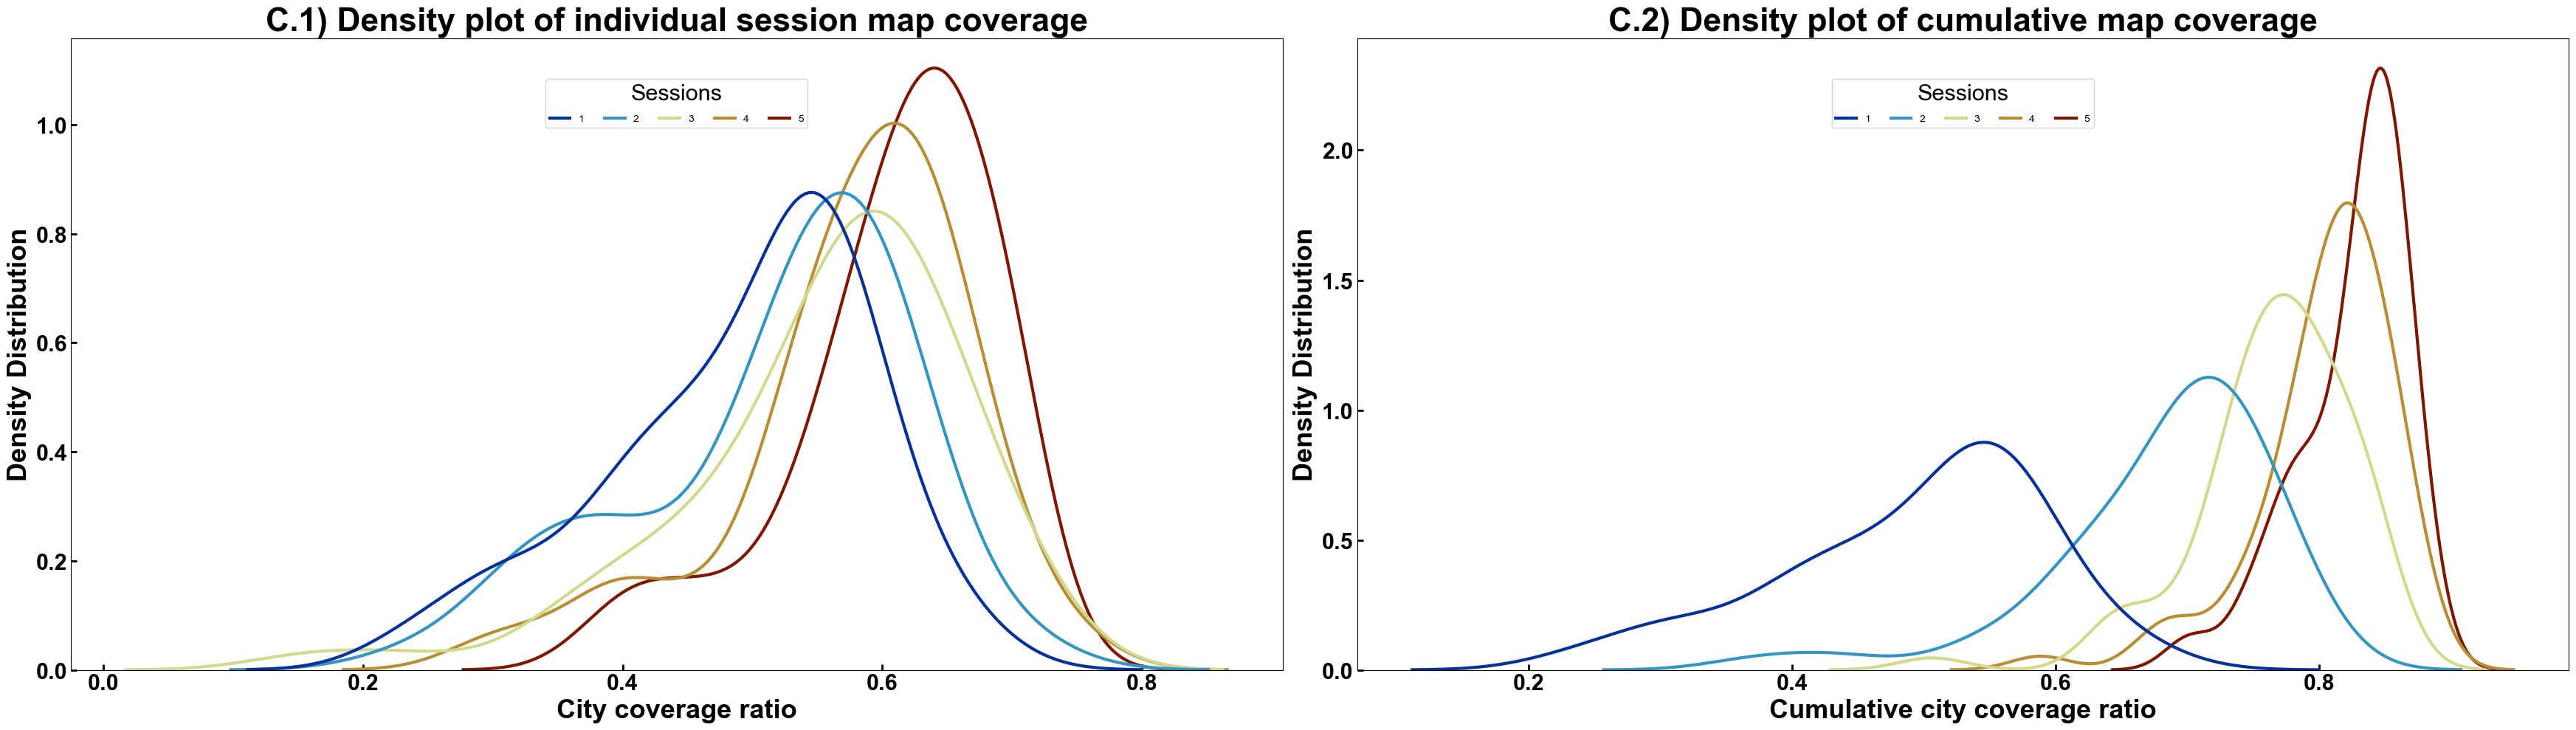

In [12]:
custom_palette = ["#033198", "#3495c3", "#d2d98d", "#b78e33", "#7e1700"]

# We are excluding two participants because they were exposed to Vincent's experiment
Mask_IDs = Coverage['ParticipantID'].isin([ 5238, 8695])
filtered_df = Coverage.loc[~Mask_IDs]


plt.rcParams['font.family'] = 'Arial'

# Set up the matplotlib figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(35, 10))  # Adjusted figure size for better layout

# KDE plot for IndividualRatio with increased line width
g = sns.kdeplot(data=filtered_df, x='IndividualRatio', hue='SessionNr', palette=custom_palette, ax=axes[0], linewidth=3)  # Increased linewidth
axes[0].set_xlabel('City coverage ratio', fontsize=26, fontweight='bold')  # Increased fontsize and set to bold
axes[0].set_ylabel('Density Distribution', fontsize=26, fontweight='bold')  # Increased fontsize and set to bold
axes[0].set_title('C.1) Density plot of individual session map coverage', fontsize=32, fontweight='bold')  # Increased fontsize and set to bold
axes[0].tick_params(labelsize=22, labelrotation=0, width=2, length=6, direction='in', grid_color='r', grid_alpha=0.5)
for tick in axes[0].get_xticklabels():
    tick.set_fontweight('bold')
for tick in axes[0].get_yticklabels():
    tick.set_fontweight('bold')
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, .85), ncol=5, title='Sessions')
leg = g.get_legend()
leg._legend_box.align = "center"
leg.set_title('Sessions', prop={'size': 22})

# Expand the size of the legend box
leg._legend_box.sep = 10

# KDE plot for CummulativeRatio with increased line width
g2 = sns.kdeplot(data=filtered_df, x='CummulativeRatio', hue='SessionNr', palette=custom_palette, ax=axes[1], linewidth=3)  # Increased linewidth
sns.move_legend(g2, "lower center", bbox_to_anchor=(.5, .85), ncol=5, title='Sessions')
leg = g2.get_legend()
leg._legend_box.align = "center"
leg.set_title('Sessions', prop={'size': 22})

axes[1].set_xlabel('Cumulative city coverage ratio', fontsize=26, fontweight='bold')  # Increased fontsize and set to bold
axes[1].set_ylabel('Density Distribution', fontsize=26, fontweight='bold')  # Increased fontsize and set to bold
axes[1].set_title('C.2) Density plot of cumulative map coverage', fontsize=32, fontweight='bold')  # Increased fontsize and set to bold
axes[1].tick_params(labelsize=22, labelrotation=0, width=2, length=6, direction='in', grid_color='r', grid_alpha=0.5)
for tick in axes[1].get_xticklabels():
    tick.set_fontweight('bold')
for tick in axes[1].get_yticklabels():
    tick.set_fontweight('bold')

# Expand the size of the legend box
leg._legend_box.sep = 10

# Improve the layout
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Coverage_Ratios.png", bbox_inches="tight", pad_inches=0.3)
plt.show()


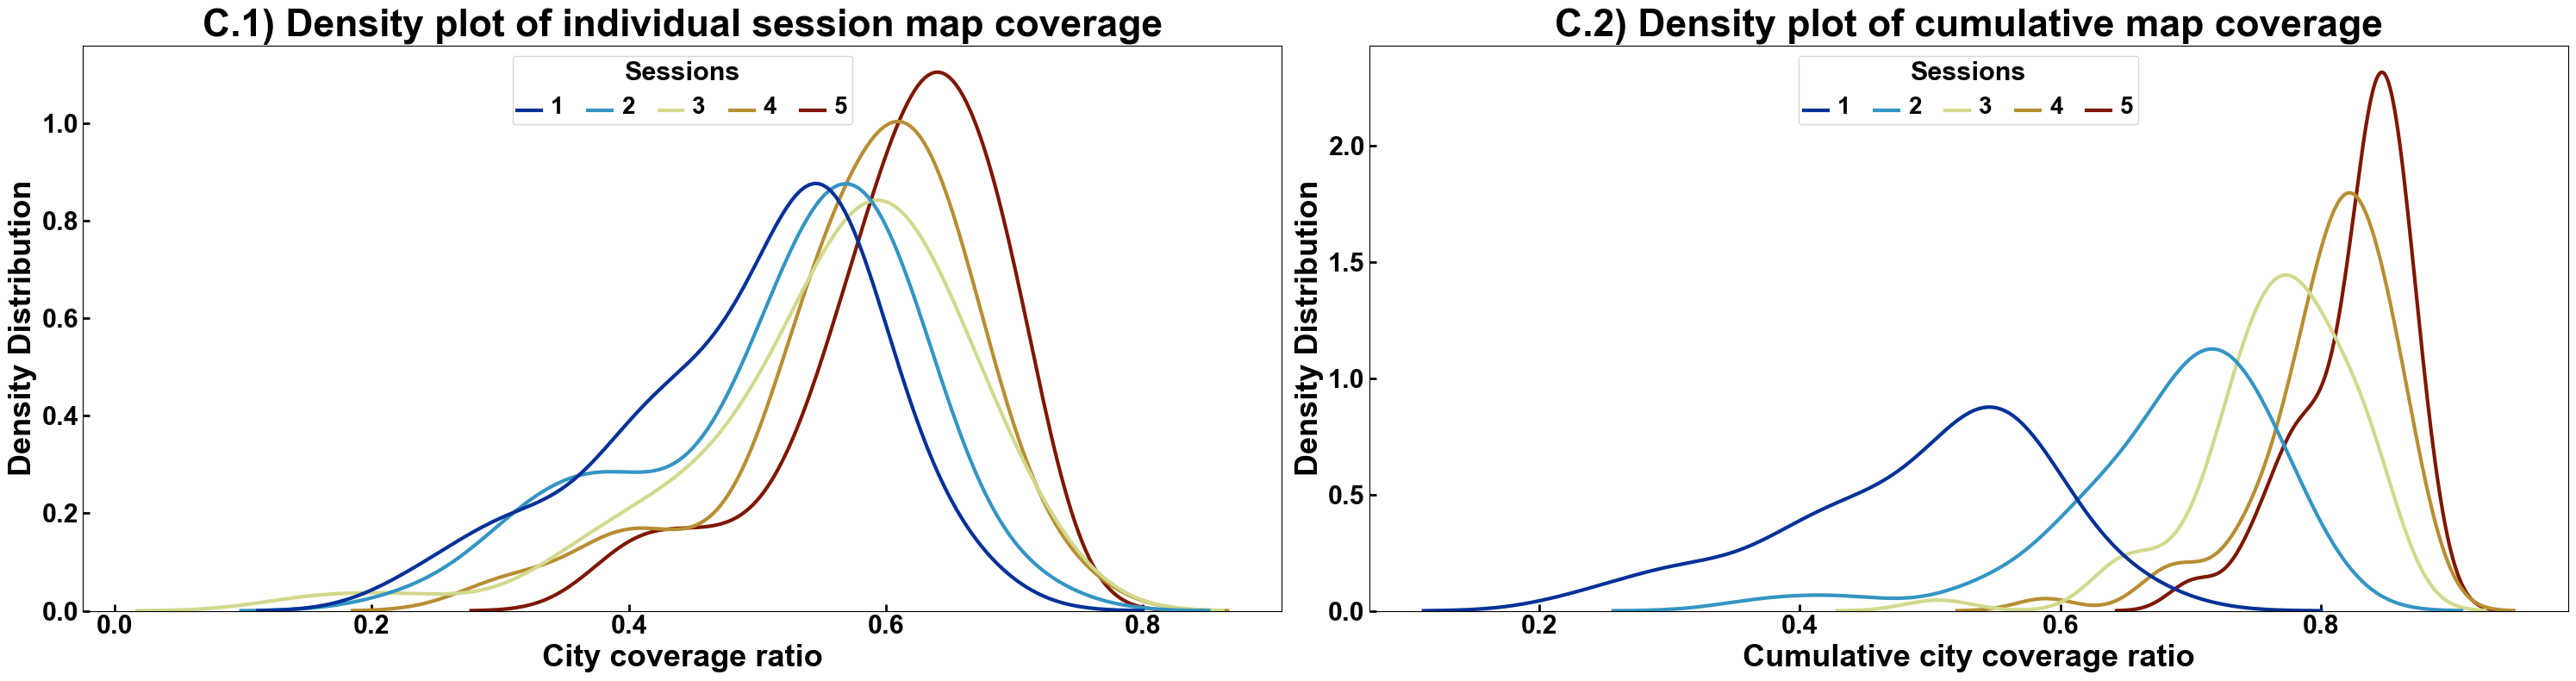

In [13]:
custom_palette = ["#033198", "#3495c3", "#d2d98d", "#b78e33", "#7e1700"]
# We are excluding two participants because they were exposed to Vincent's experiment
Mask_IDs = Coverage['ParticipantID'].isin([ 5238, 8695])
filtered_df = Coverage.loc[~Mask_IDs]


# Set up the matplotlib figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(30, 8))  # Adjusted figure size for better layout

# KDE plot for IndividualRatio with increased line width
g = sns.kdeplot(data=filtered_df, x='IndividualRatio', hue='SessionNr', palette=custom_palette, ax=axes[0], linewidth=3)  # Increased linewidth
axes[0].set_xlabel('City coverage ratio', fontsize=26, fontweight='bold')  # Increased fontsize and set to bold
axes[0].set_ylabel('Density Distribution', fontsize=26, fontweight='bold')  # Increased fontsize and set to bold
axes[0].set_title('C.1) Density plot of individual session map coverage', fontsize=32, fontweight='bold')  # Increased fontsize and set to bold
axes[0].tick_params(labelsize=22, labelrotation=0, width=2, length=6, direction='in', grid_color='r', grid_alpha=0.5)
for tick in axes[0].get_xticklabels():
    tick.set_fontweight('bold')
for tick in axes[0].get_yticklabels():
    tick.set_fontweight('bold')
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, .85), ncol=5, title='Sessions')
leg = g.get_legend()
leg._legend_box.align = "center"
leg.set_title('Sessions', prop={'size': 22, 'weight': 'bold'})
for text in leg.get_texts():
    text.set_fontsize(20)
    text.set_fontweight('bold')

# Expand the size of the legend box
leg._legend_box.sep = 10

# KDE plot for CummulativeRatio with increased line width
g2 = sns.kdeplot(data=filtered_df, x='CummulativeRatio', hue='SessionNr', palette=custom_palette, ax=axes[1], linewidth=3)  # Increased linewidth
sns.move_legend(g2, "lower center", bbox_to_anchor=(.5, .85), ncol=5, title='Sessions')
leg = g2.get_legend()
leg._legend_box.align = "center"
leg.set_title('Sessions', prop={'size': 22, 'weight': 'bold'})
for text in leg.get_texts():
    text.set_fontsize(20)
    text.set_fontweight('bold')

axes[1].set_xlabel('Cumulative city coverage ratio', fontsize=26, fontweight='bold')  # Increased fontsize and set to bold
axes[1].set_ylabel('Density Distribution', fontsize=26, fontweight='bold')  # Increased fontsize and set to bold
axes[1].set_title('C.2) Density plot of cumulative map coverage', fontsize=32, fontweight='bold')  # Increased fontsize and set to bold
axes[1].tick_params(labelsize=22, labelrotation=0, width=2, length=6, direction='in', grid_color='r', grid_alpha=0.5)
for tick in axes[1].get_xticklabels():
    tick.set_fontweight('bold')
for tick in axes[1].get_yticklabels():
    tick.set_fontweight('bold')

# Expand the size of the legend box
leg._legend_box.sep = 10

# Improve the layout
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Coverage_Ratios.png", bbox_inches="tight", pad_inches=0.3)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'Coverage', 'IndividualRatio', 'CummulativeRatio', and 'SessionNr' are correctly named in your DataFrame.
custom_palette = ["#033198", "#3495c3", "#d2d98d", "#b78e33", "#7e1700"]
filtered_df = Coverage[Coverage['Experiment'] != 'control'].copy()
plt.rcParams['font.family'] = 'Arial'

fig, axes = plt.subplots(1, 2, figsize=(30,8), sharey=True)

# Check that 'SessionNr' is a column in 'filtered_df' and it has valid categorical data for hue
sns.kdeplot(data=filtered_df, x='IndividualRatio', hue='SessionNr', palette=custom_palette, ax=axes[0])
axes[0].set_xlabel('City coverage ratio', fontsize=20)
axes[0].set_ylabel('Density Distribution', fontsize=20)
axes[0].set_title('C.1) Density plot of individual session map coverage', fontsize=18)
axes[0].tick_params(labelsize=20)

# Get handles and labels from the first plot
#handles, labels = axes[0].get_legend_handles_labels()
#axes[0].legend(handles, labels, title="Sessions", loc='upper left', fontsize='large')

# Customizing the Legend
sns.kdeplot(data=filtered_df, x='CummulativeRatio', hue='SessionNr', palette=custom_palette, legend=None, ax=axes[1])
axes[1].set_xlabel('Cumulative city coverage', fontsize=20)
axes[1].set_ylabel('Density Distribution', fontsize=20)
axes[1].set_title('C.2) Density plot of cumulative map coverage', fontsize=18)
axes[1].tick_params(labelsize=18)


plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Coverage_Ratios.png", bbox_inches="tight", pad_inches=0.3)
plt.show()


In [ ]:
axes[0].legend()

In [ ]:
filtered_df.head()

In [ ]:
filtered_df['IndividualNodeCount'].agg(['mean', 'std'])

In [ ]:
filtered_df.groupby('SessionNr')['IndividualRatio'].agg(['mean', 'std'])

In [ ]:

# Filter the data for Session number 5
session_5_data = filtered_df[filtered_df['SessionNr'] == 5]

# Calculate descriptive statistics for CummulativeRatio for Session number 5
session_5_cummulative_ratio_stats = session_5_data['CummulativeRatio'].agg(['mean', 'std'])
session_5_cummulative_ratio_stats

In [ ]:
filtered_df.min()

In [ ]:
# Assuming 'mapCoverage' is your DataFrame and 'Ratio' and 'SessionNr' are columns in your DataFrame

# Create a custom palette
custom_husl = sns.husl_palette(n_colors=8, s=1.5, l=0.65)

# Set up the matplotlib figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)  # 2 rows, 1 column, sharing x-axis

# First subplot: Boxplot (Horizontal)
sns.boxplot(data=mapCoverage, hue='SessionNr', x='Ratio', palette=custom_husl, ax=axes[0], orient='h')
axes[0].set_title('A) Map coverage as proportion of nodes visited per session')
axes[0].set_ylabel('Session Number')

# Second subplot: KDE plot
sns.kdeplot(data=mapCoverage, x='Ratio', hue='SessionNr', palette=custom_husl, ax=axes[1])
axes[1].set_title('B) Density distribution of proportion of nodes visited per session')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Ratio of visited nodes/total nodes')
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Participants_Exploration_CoverageRatio.png",  bbox_inches="tight",
            pad_inches=0.3)
plt.show()


In [ ]:
Complete_Behavioral = pd.read_csv("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/BehavioralData_Fixations_Wide.csv", sep =",")

In [ ]:
Participant_Coverage = mapCoverage.groupby("ParticipantID")["Ratio"].mean().reset_index()

In [ ]:
Participant_Coverage.rename({"ParticipantID":"SubjectID" }, axis=1, inplace=True)

In [ ]:
Beha = Complete_Behavioral.SubjectID.unique()
Cove = Participant_Coverage.SubjectID.unique()
difference = [item for item in Beha if item not in Cove]
print(difference)

In [ ]:
Complete_Behavioral.info()

In [ ]:
Complete_Concat=  pd.merge(Complete_Behavioral, Participant_Coverage, on='SubjectID', how='left')

In [ ]:
Complete_Concat.info()

In [ ]:
# Replacing NaN values with the mean of that column
Complete_Concat['Ratio_inter'] = Complete_Concat['Ratio'].fillna(Complete_Concat['Ratio'].mean())

In [ ]:
Complete_Concat.info()

In [ ]:
Complete_Concat.to_csv("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/BehavioralData_Fixations_Wide_Coverage.csv")